In [26]:
from IPython.display import Latex
Latex(r"""\begin{eqnarray} \large
Z_{n+1} = Z_{n}^{1.5 * Z_{n}^{\sqrt{-1} * (p_{1}^{1.5 * Z_{n}^{p_{2}}})}}
\qquad \qquad \small p = [2.76544+0.997995j, 50.1518+7.53287j]
\end{eqnarray}""")

<IPython.core.display.Latex object>

### numerical discovery - this may actually be what an unborn Unicorn looks like.
    Sequential iteration of difference equation:
    Z = Z^(1.5 * Z^(i * p(1)^(1.5 * Z^p(2)))
    
    with parameter set:
    p = [2.76544+0.997995j, 50.1518+7.53287j]
    
    on the complex plane computes this organic graphic.

In [28]:
import warnings
warnings.filterwarnings('ignore')

import os
import sys   
import numpy as np
import time

from IPython.display import SVG
from IPython.display import Image
from IPython.display import display

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as ip

sys.path.insert(1, '../src');   import z_plane as zp
import graphic_utility as gu;   import itergataters as ig

In [29]:
def unicorn_in_utero(Z, p, Z0=None, ET=None):
    """ Z = bugga_bear(Z, p) 
    Args:
        Z:    a real or complex number
        p:    a real of complex number # p = [2.76544+0.997995j, 50.1518+7.53287j]
    Returns:
        Z:    the result (complex)
    """
    Z = Z**(1.5 * Z**(1j * p[0]**(1.5 * Z**p[1])))
    return Z

In [32]:
#                                        -- machine with 8 cores --
par_set = {'n_rows': 800, 'n_cols': 800}
par_set['center_point'] = -0.25 + 0.0*1j
par_set['theta'] = 0.0
par_set['zoom'] = 5/8

par_set['it_max'] = 64
par_set['max_d'] = 10 / par_set['zoom']
par_set['dir_path'] = os.getcwd()

p = [2.76544+0.997995j, 50.1518+7.53287j]

list_tuple = [(unicorn_in_utero, (p))]

t0 = time.time()
ET, Z, Z0 = ig.get_primitives(list_tuple, par_set)
tt = time.time() - t0
print(tt, '\t total time')

20.216410160064697 	 total time


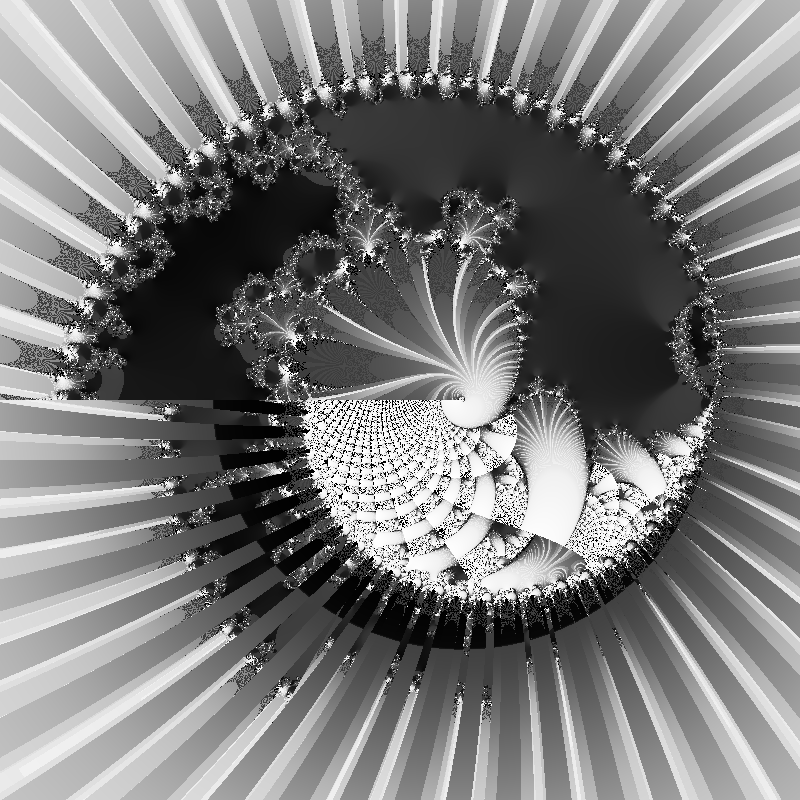

In [33]:
Mz = gu.mat2graphic(Z)
display(gu.mat_to_gray(Mz))

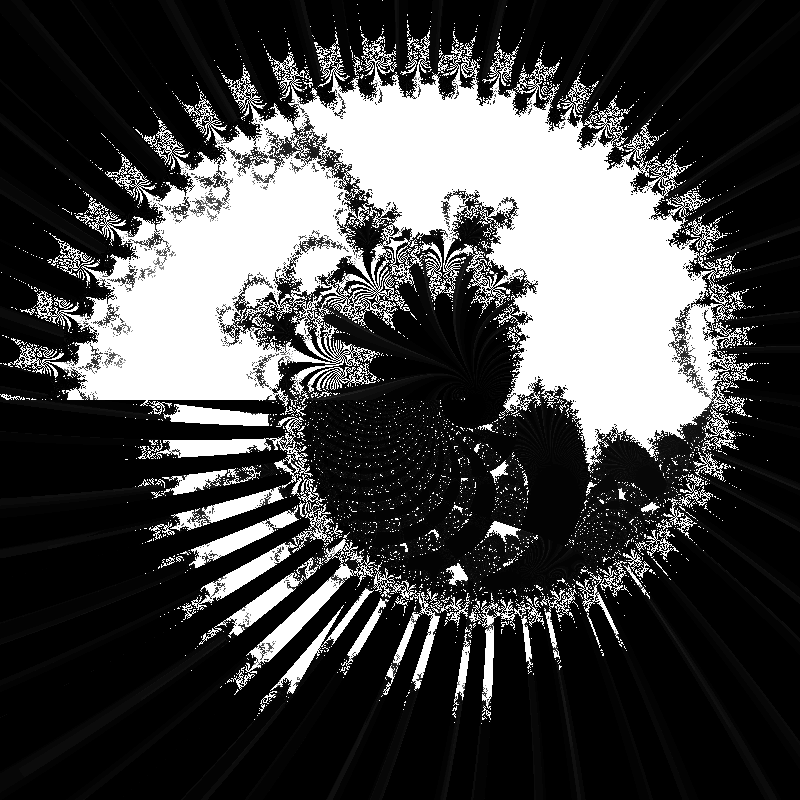

In [34]:
M_et = gu.mat2graphic(ET)
display(gu.mat_to_gray(M_et))

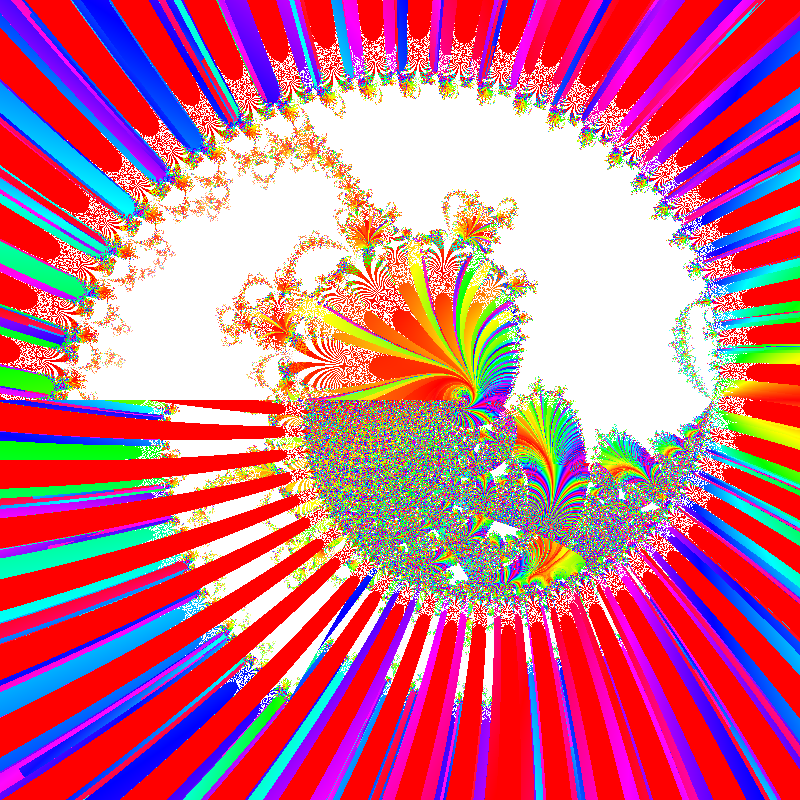

In [35]:
Ic = gu.Z_ET_to_show((Z-Z0), ET)
display(Ic)